# GOOD BEER PROJECT #
* This file only contains EDA on data. If your looking for EDA check the "Good Beer Project IDA File"
* All data used for this project can be found online at Kaggel.com
* The data used in this file is a cleaned version of public data found on Kaggel.com. Please look at the IDA file for this project to reserve a copy of the clean data used for this file.
* The goal of this file is to organize the public information found online into a single data file to be used for EDA.

## Load in the Merged df from the IDA file ##

In [1]:
# Load CSV Desktop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy.stats import gaussian_kde
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

file_path_main = r'C:\Users\jrruh\OneDrive\Documents\Homework\Data Sciance\CSME 830\Project 1\Merged_Beer_DF'
final_merged_df = pd.read_csv(file_path_main)


## Short IDA on merger data ##
* The merged data frame contains a lot of information regarding beer. The df contains over 5000 different commercial beers all ranked by the website Brewers Advocate.
* Here is a list of data to included in the df.
1. Name of beer
2. Style_x and Style key relate to the style of the beer. Style_x is a merged style name of similar styles. Information related to Style_x might not be 100% correct as during the expansion of the data some styles listed in one dataset were not present in the other dataset during merging. If a style could not be found in both data sets then a style of the closest type was merged onto the original style of the beer. All styles in Style_x are the original style names of the commercial beer.
3. Brewery
4. Ave Rating
5. ABV and Style-ABV: AVB is the original ABV of the beer listed while style-ABV is an average of the overall brewing style ABV taken from a larger population of beers with a specific style.
6. MIN/MAX IBUs and Style-IBUs: MIN/MAX IBU Values are given estimations of the original beer and counted in intervals of 5. Style-IBUs is an average of the overall brewing style IBUs taken from a larger population of beers with a specific style.
8. Flavor profile columns: A beer flavor profile contains qualitative values of a beers flavor
9. Style Color: Style Color is an average of the overall brewing style color taken from a larger population of beers with a specific style. Beer color is measured in SRM units SRM ranges from 0-40 with zero being clear like water and 40 being black like tar.
10. Style OG and FG: Style OG and FG is an average of the overall brewing style OG and FG taken from a larger population of beers with a specific style. OG and FG are used to determent a beers body/thickness and ABV.

In [2]:
final_merged_df.info()
final_merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5420 entries, 0 to 5419
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              5418 non-null   object 
 1   Style_x           5420 non-null   object 
 2   Style Key         5420 non-null   int64  
 3   Brewery           5420 non-null   object 
 4   ABV               5420 non-null   float64
 5   Ave Rating        5420 non-null   float64
 6   Min IBU           5420 non-null   float64
 7   Max IBU           5420 non-null   float64
 8   Astringency       5420 non-null   int64  
 9   Body              5420 non-null   int64  
 10  Alcohol           5420 non-null   int64  
 11  Bitter            5420 non-null   int64  
 12  Sweet             5420 non-null   int64  
 13  Sour              5420 non-null   int64  
 14  Salty             5420 non-null   int64  
 15  Fruits            5420 non-null   int64  
 16  Hoppy             5420 non-null   int64  


Style Key          ABV   Ave Rating      Min IBU      Max IBU  \
count  5420.000000  5420.000000  5420.000000  5420.000000  5420.000000   
mean     64.565314     6.642847     3.762613    21.765681    40.461545   
std      35.718600     2.474112     0.440952    13.025966    20.537389   
min       2.000000     0.050000     1.270000     0.000000     6.000000   
25%      35.000000     5.000000     3.590000    15.000000    25.000000   
50%      64.000000     6.000000     3.820000    20.000000    37.498868   
75%      95.000000     7.850000     4.040000    25.000000    50.000000   
max     126.000000    57.500000     4.810000    65.000000   100.000000   

       Astringency         Body      Alcohol       Bitter        Sweet  ...  \
count  5420.000000  5420.000000  5420.000000  5420.000000  5420.000000  ...   
mean     16.344096    43.834317    16.381550    35.189852    54.995203  ...   
std      11.486581    28.115837    18.318787    26.895476    35.270771  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       8.000000    26.000000     5.000000    14.000000    28.000000  ...   
50%      14.000000    38.000000    10.000000    30.000000    51.000000  ...   
75%      22.000000    56.000000    20.000000    52.000000    75.000000  ...   
max      83.000000   197.000000   139.000000   150.000000   263.000000  ...   

       Style Color Mean  Style Color Var  Style OG Mean  Style OG Var  \
count       5420.000000      5420.000000    5420.000000   5420.000000   
mean          15.034694        42.003984       1.062696      0.008007   
std           10.679365        35.006902       0.014763      0.046050   
min            3.705241         2.089362       1.040036      0.000010   
25%            6.309153        13.773112       1.051913      0.000088   
50%           13.679533        34.578090       1.057103      0.000141   
75%           19.296245        61.781186       1.067893      0.000238   
max           44.976844       147.501446       1.104844      0.280910   

       Style FG Mean  Style FG Var  Style ABV Mean  Style ABV Var  \
count    5420.000000   5420.000000     5420.000000    5420.000000   
mean        1.014399      0.000333        6.293306       2.521322   
std         0.003625      0.001831        1.495812       6.078368   
min         1.008468      0.000005        3.932500       0.057194   
25%         1.011855      0.000011        5.249904       0.939174   
50%         1.014019      0.000018        5.820972       1.420841   
75%         1.016102      0.000027        6.652826       2.612633   
max         1.024677      0.011185       10.599971      82.241343   

       Style IBU Mean  Style IBU Var  
count     5420.000000    5420.000000  
mean        35.886473     921.060398  
std         18.423642    2825.235269  
min          6.427696      36.320158  
25%         25.471552     177.066209  
50%         31.405519     317.068000  
75%         39.496565     772.468911  
max        117.806475   25608.706584  

[8 rows x 28 columns]

In [3]:
final_merged_df.head()

Name  Style_x  Style Key                         Brewery  ABV  \
0           Amber  Altbier          8             Alaskan Brewing Co.  5.3   
1      Double Bag  Altbier          8          Long Trail Brewing Co.  7.2   
2  Long Trail Ale  Altbier          8          Long Trail Brewing Co.  5.0   
3    Doppelsticke  Altbier          8  Uerige Obergärige Hausbrauerei  8.5   
4          Scurry  Altbier          8               Off Color Brewing  5.3   

   Ave Rating  Min IBU  Max IBU  Astringency  Body  ...  Style Color Mean  \
0        3.65     25.0     50.0           13    32  ...         13.985839   
1        3.90     25.0     50.0           12    57  ...         13.985839   
2        3.58     25.0     50.0           14    37  ...         13.985839   
3        4.15     25.0     50.0           13    55  ...         13.985839   
4        3.67     25.0     50.0           21    69  ...         13.985839   

   Style Color Var  Style OG Mean  Style OG Var  Style FG Mean  Style FG Var  \
0        11.802602       1.050707      0.000045       1.011855      0.000008   
1        11.802602       1.050707      0.000045       1.011855      0.000008   
2        11.802602       1.050707      0.000045       1.011855      0.000008   
3        11.802602       1.050707      0.000045       1.011855      0.000008   
4        11.802602       1.050707      0.000045       1.011855      0.000008   

   Style ABV Mean  Style ABV Var  Style IBU Mean  Style IBU Var  
0        5.104161       0.487998        39.14146     201.344771  
1        5.104161       0.487998        39.14146     201.344771  
2        5.104161       0.487998        39.14146     201.344771  
3        5.104161       0.487998        39.14146     201.344771  
4        5.104161       0.487998        39.14146     201.344771  

[5 rows x 32 columns]

## Univerible/Bivarible analysis ##
* Most of the data is more intreating to look at in terms of mutiverible analysis but we can still look at a few single variable details

Total number of berwerys listed 1443

Number of Different Beers Made by a Brewery

 Brewery
Boston Beer Company (Samuel Adams)                                      81
Anheuser-Busch                                                          49
Dogfish Head Craft Brewery                                              41
3 Floyds Brewing Co.                                                    40
Short's Brewing Company                                                 36
Founders Brewing Company                                                35
Victory Brewing Company - Downingtown                                   35
Rogue Ales                                                              33
Sierra Nevada Brewing Co.                                               33
Hill Farmstead Brewery                                                  32
Bell's Brewery - Eccentric Café & General Store                         32
Ballast Point Brewing Company                                           31
Allagash

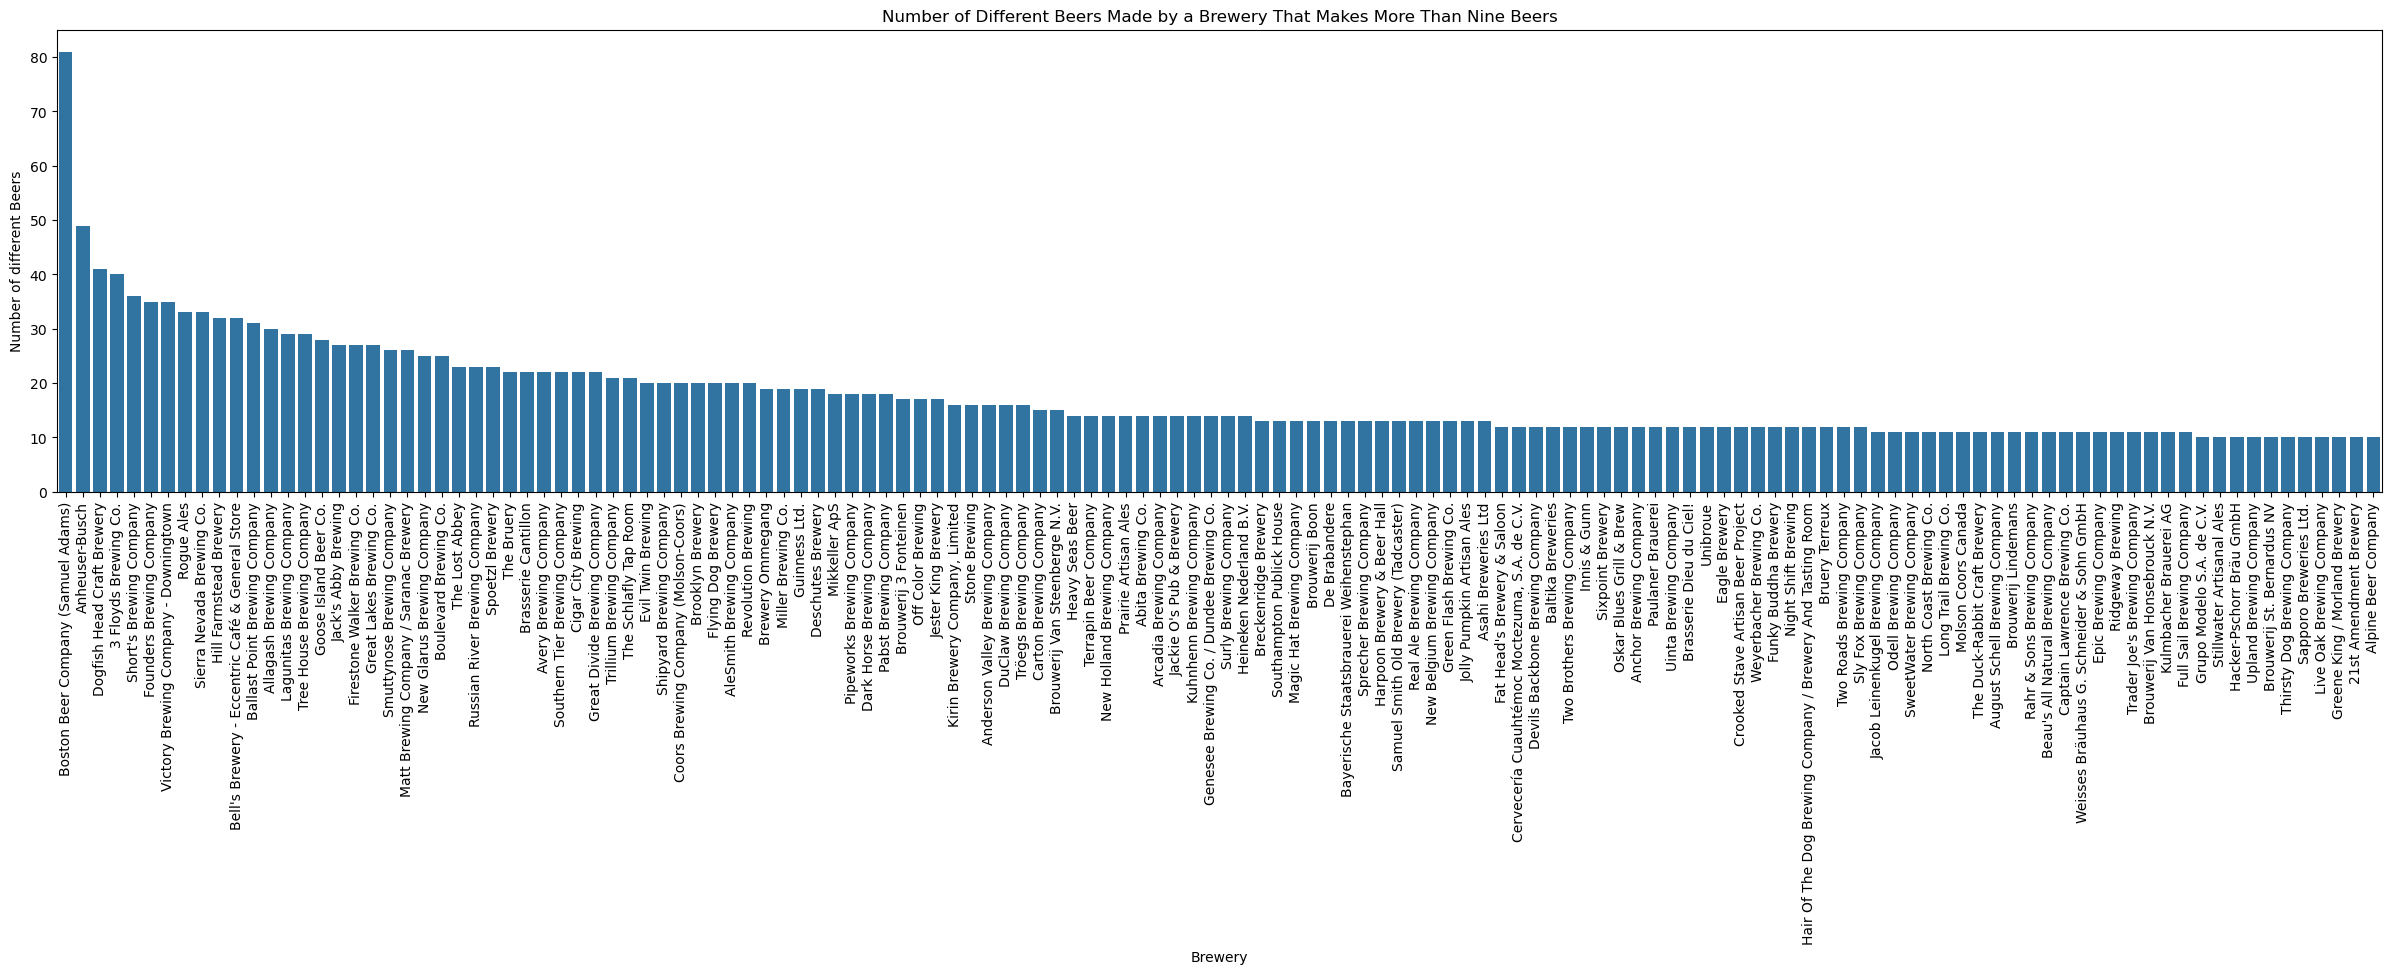

In [4]:
# number of brewery listed
n_berwery = final_merged_df['Brewery'].nunique()
print('Total number of berwerys listed', n_berwery)


# Which brewers market the most beer diversity
dfbr_maker_counts = final_merged_df['Brewery'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_rows', None):
    print('\nNumber of Different Beers Made by a Brewery\n\n',dfbr_maker_counts)

# Need to filter out small brewery's 
counts_over_nine = dfbr_maker_counts[dfbr_maker_counts > 9]
plt.figure(figsize=(30, 6))
sns.barplot(counts_over_nine)
plt.title('Number of Different Beers Made by a Brewery That Makes More Than Nine Beers')
plt.xticks(rotation=90)
plt.ylabel('Number of different Beers')
plt.show()

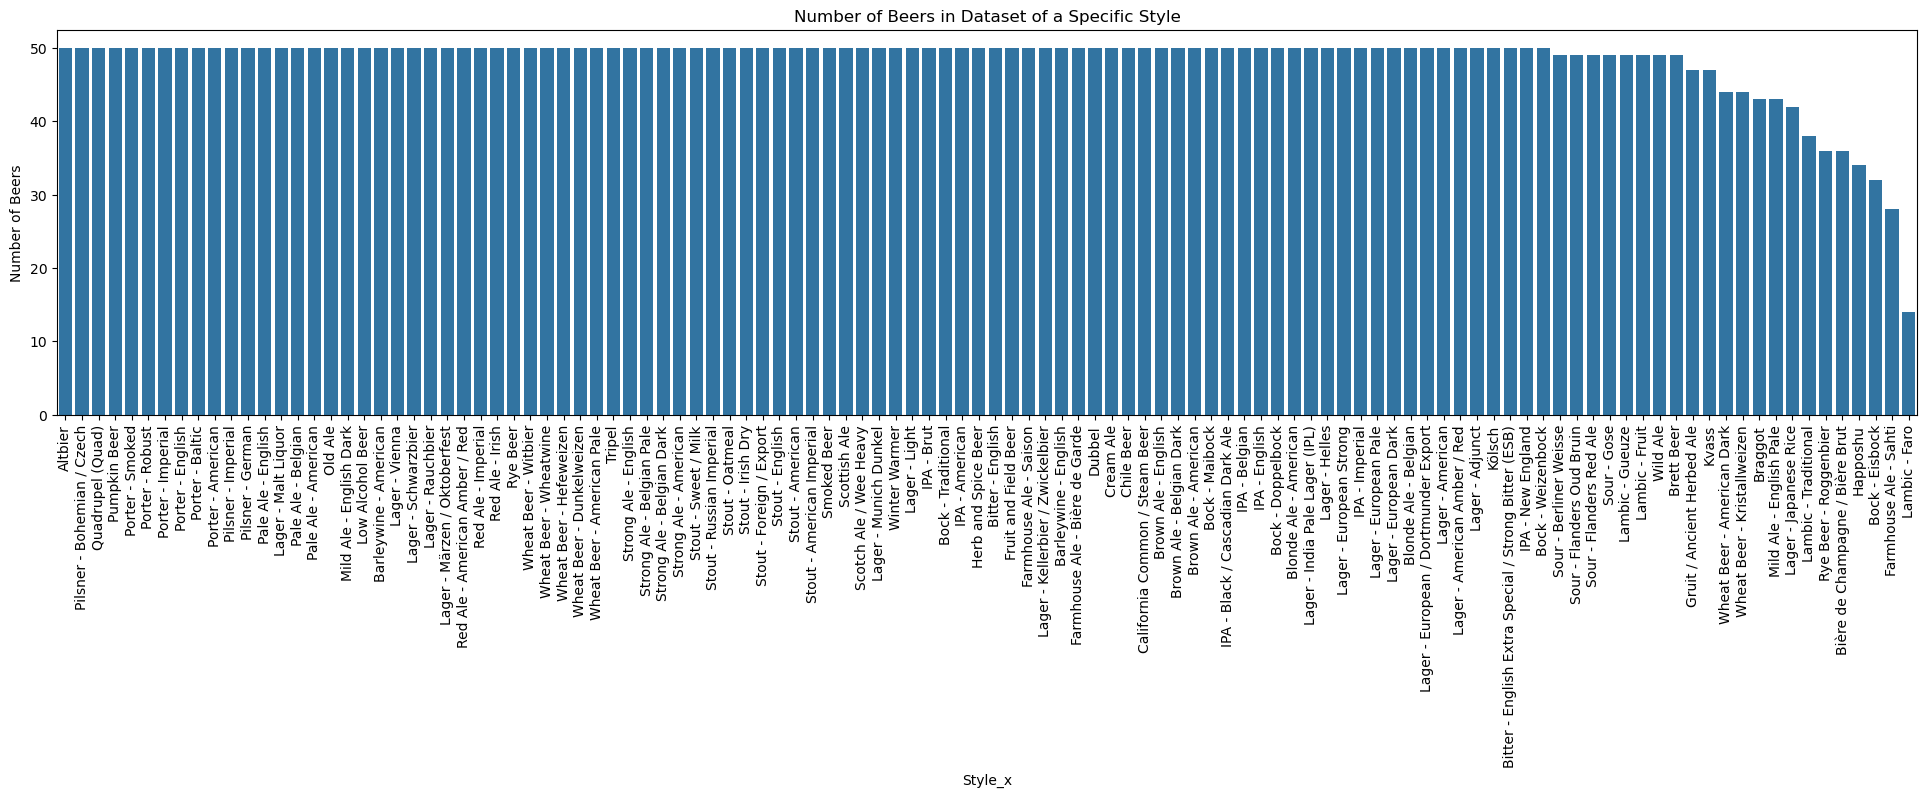

In [5]:
# number of beers in a specific style
dfbr_style_counts = final_merged_df['Style_x'].value_counts()
# with pd.option_context('display.max_rows', None, 'display.max_rows', None):
#     print(dfbr_style_counts)

plt.figure(figsize = (24,5))
sns.barplot(dfbr_style_counts)
plt.title('Number of Beers in Dataset of a Specific Style')
plt.xticks(rotation=90)
plt.ylabel('Number of Beers')
plt.show()

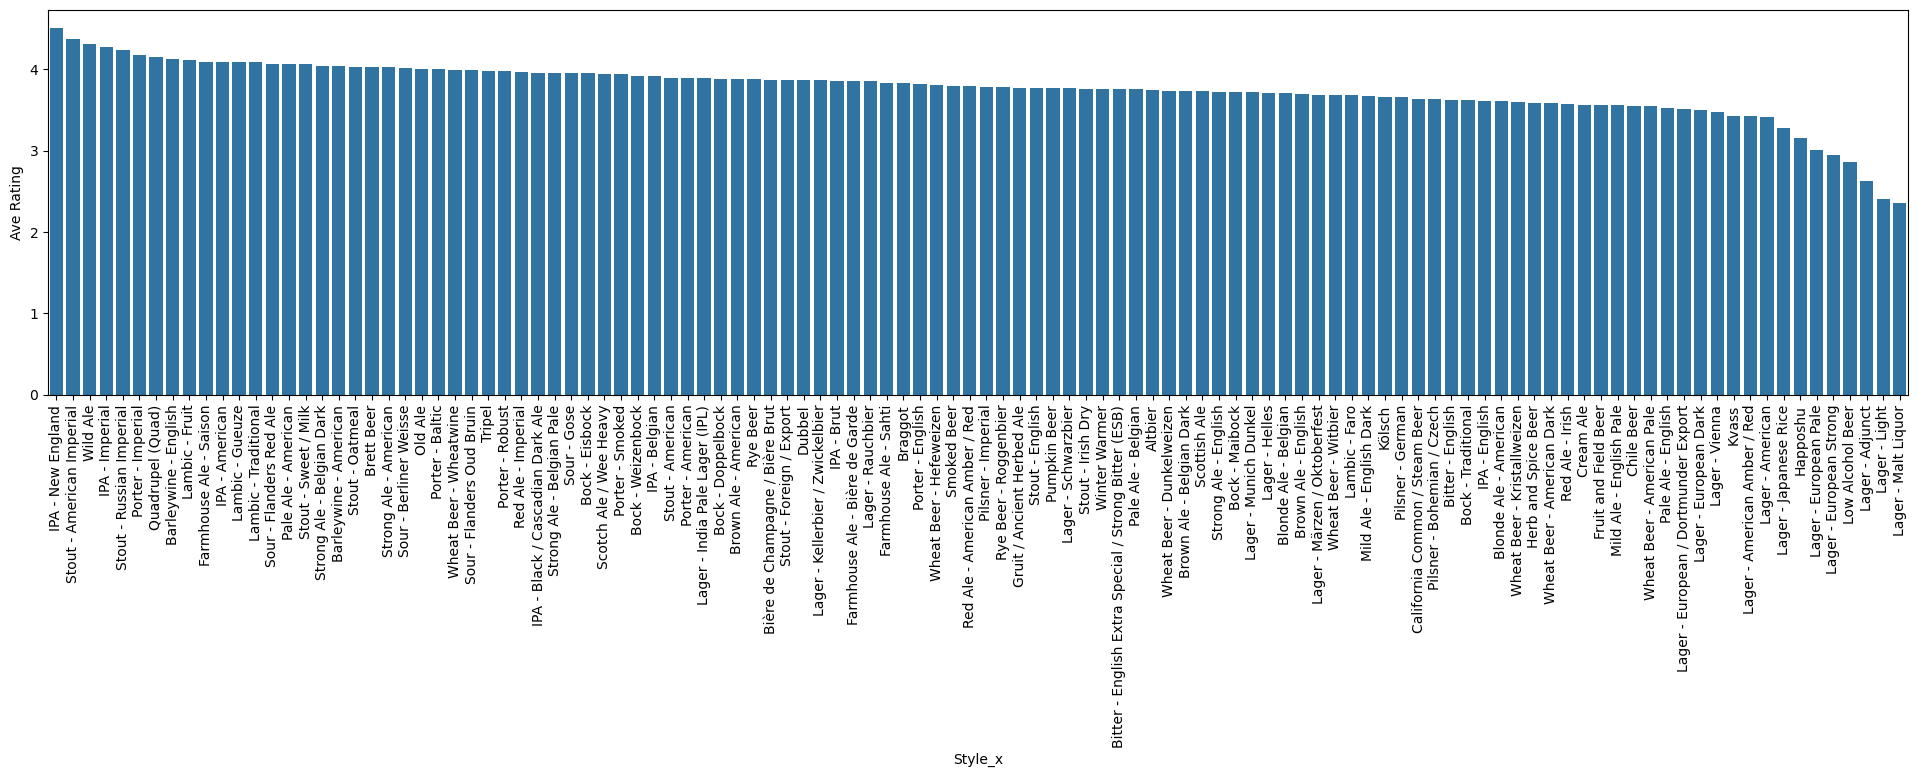

In [6]:
# what styles have the highest rating
mean_ratings = final_merged_df.groupby('Style_x')['Ave Rating'].mean().reset_index()
mean_ratings_sorted = mean_ratings.sort_values(by='Ave Rating', ascending=False)
mean_ratings_sorted.reset_index(drop=True, inplace=True)
# with pd.option_context('display.max_rows', None, 'display.max_rows', None):
#     print(mean_ratings_sorted)

plt.figure(figsize = (24,5))
sns.barplot(mean_ratings_sorted, x= 'Style_x', y= 'Ave Rating')
plt.xticks(rotation=90)
plt.show()

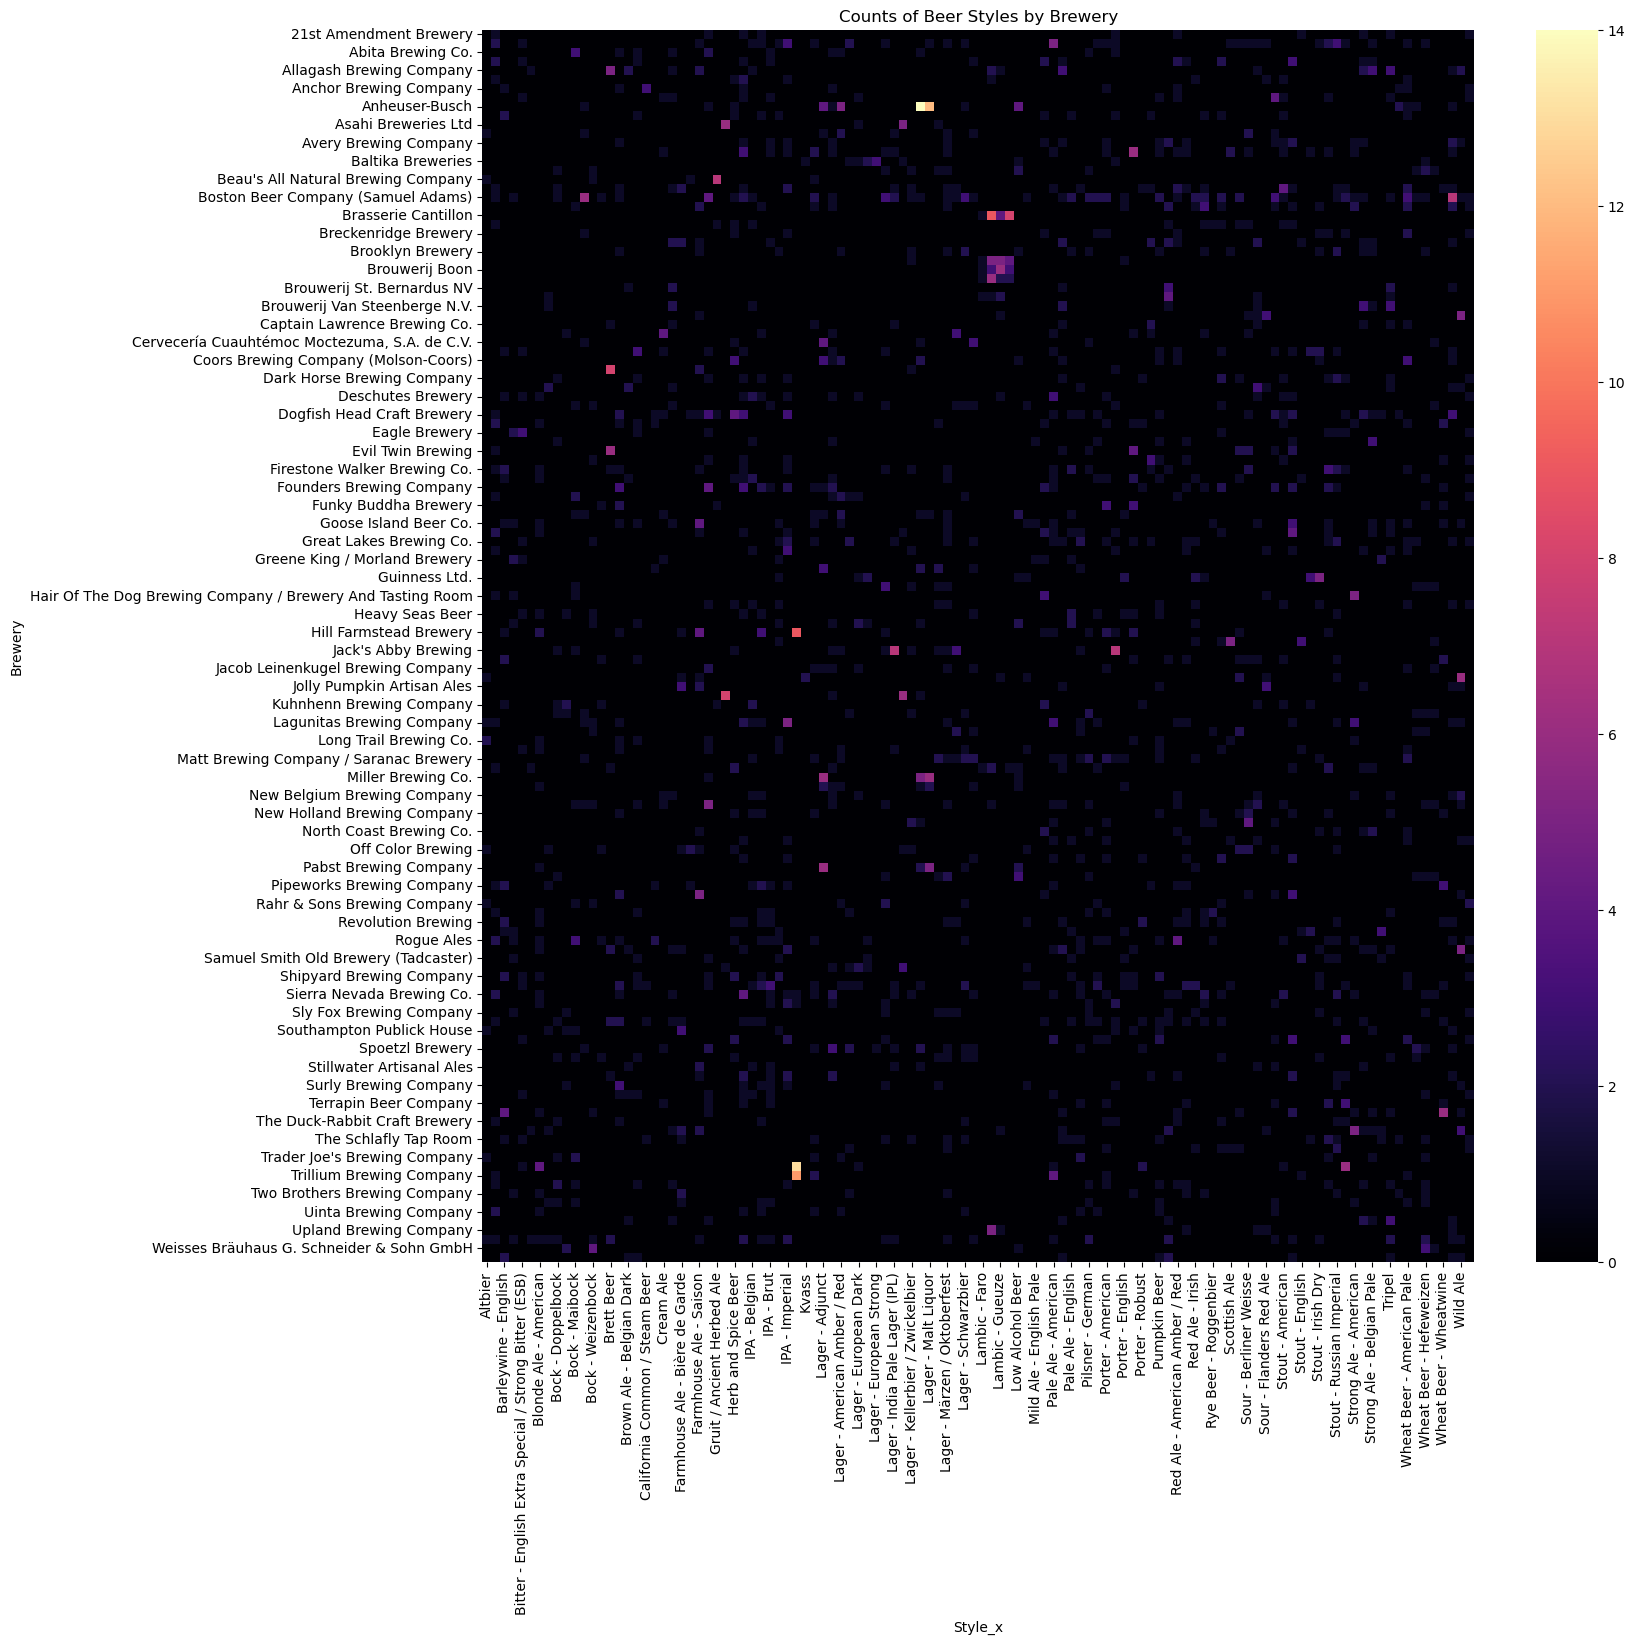

In [7]:
#  Which brewers make the most of which style of beer
brewery_to_keep = dfbr_maker_counts[dfbr_maker_counts > 9].index
filtered_brewerys = final_merged_df[final_merged_df['Brewery'].isin(brewery_to_keep)]
heatmap_style_vs_maker = pd.crosstab(filtered_brewerys['Brewery'], filtered_brewerys['Style_x'])
plt.figure(figsize=(16, 16))
sns.heatmap(heatmap_style_vs_maker, cmap='magma')
plt.title('Counts of Beer Styles by Brewery')
plt.show()

The heat map above is a bit hard to look at but it shows that not all beers of a specific style come from multiple brewery's. Some brewery's specialize in only a specific style while other brewery's diversify there beer styles.

## Maltivariate Corrilation and Trend Identification ##

### Beer Feature heat map organized by style and average style rating ###
The heat map below shows the features flavors and property of beer as columns and rows are each of the recognized 124 beer styles. The default organization of the heat map is style organized by average style rating

Style_x
IPA - New England            2.164227
Stout - American Imperial    1.764992
Wild Ale                     1.583737
IPA - Imperial               1.486226
Stout - Russian Imperial     1.373323
                               ...   
Lager - European Strong     -2.378668
Low Alcohol Beer            -2.641139
Lager - Adjunct             -3.295861
Lager - Light               -3.949418
Lager - Malt Liquor         -4.079781
Name: Ave Rating, Length: 112, dtype: float64


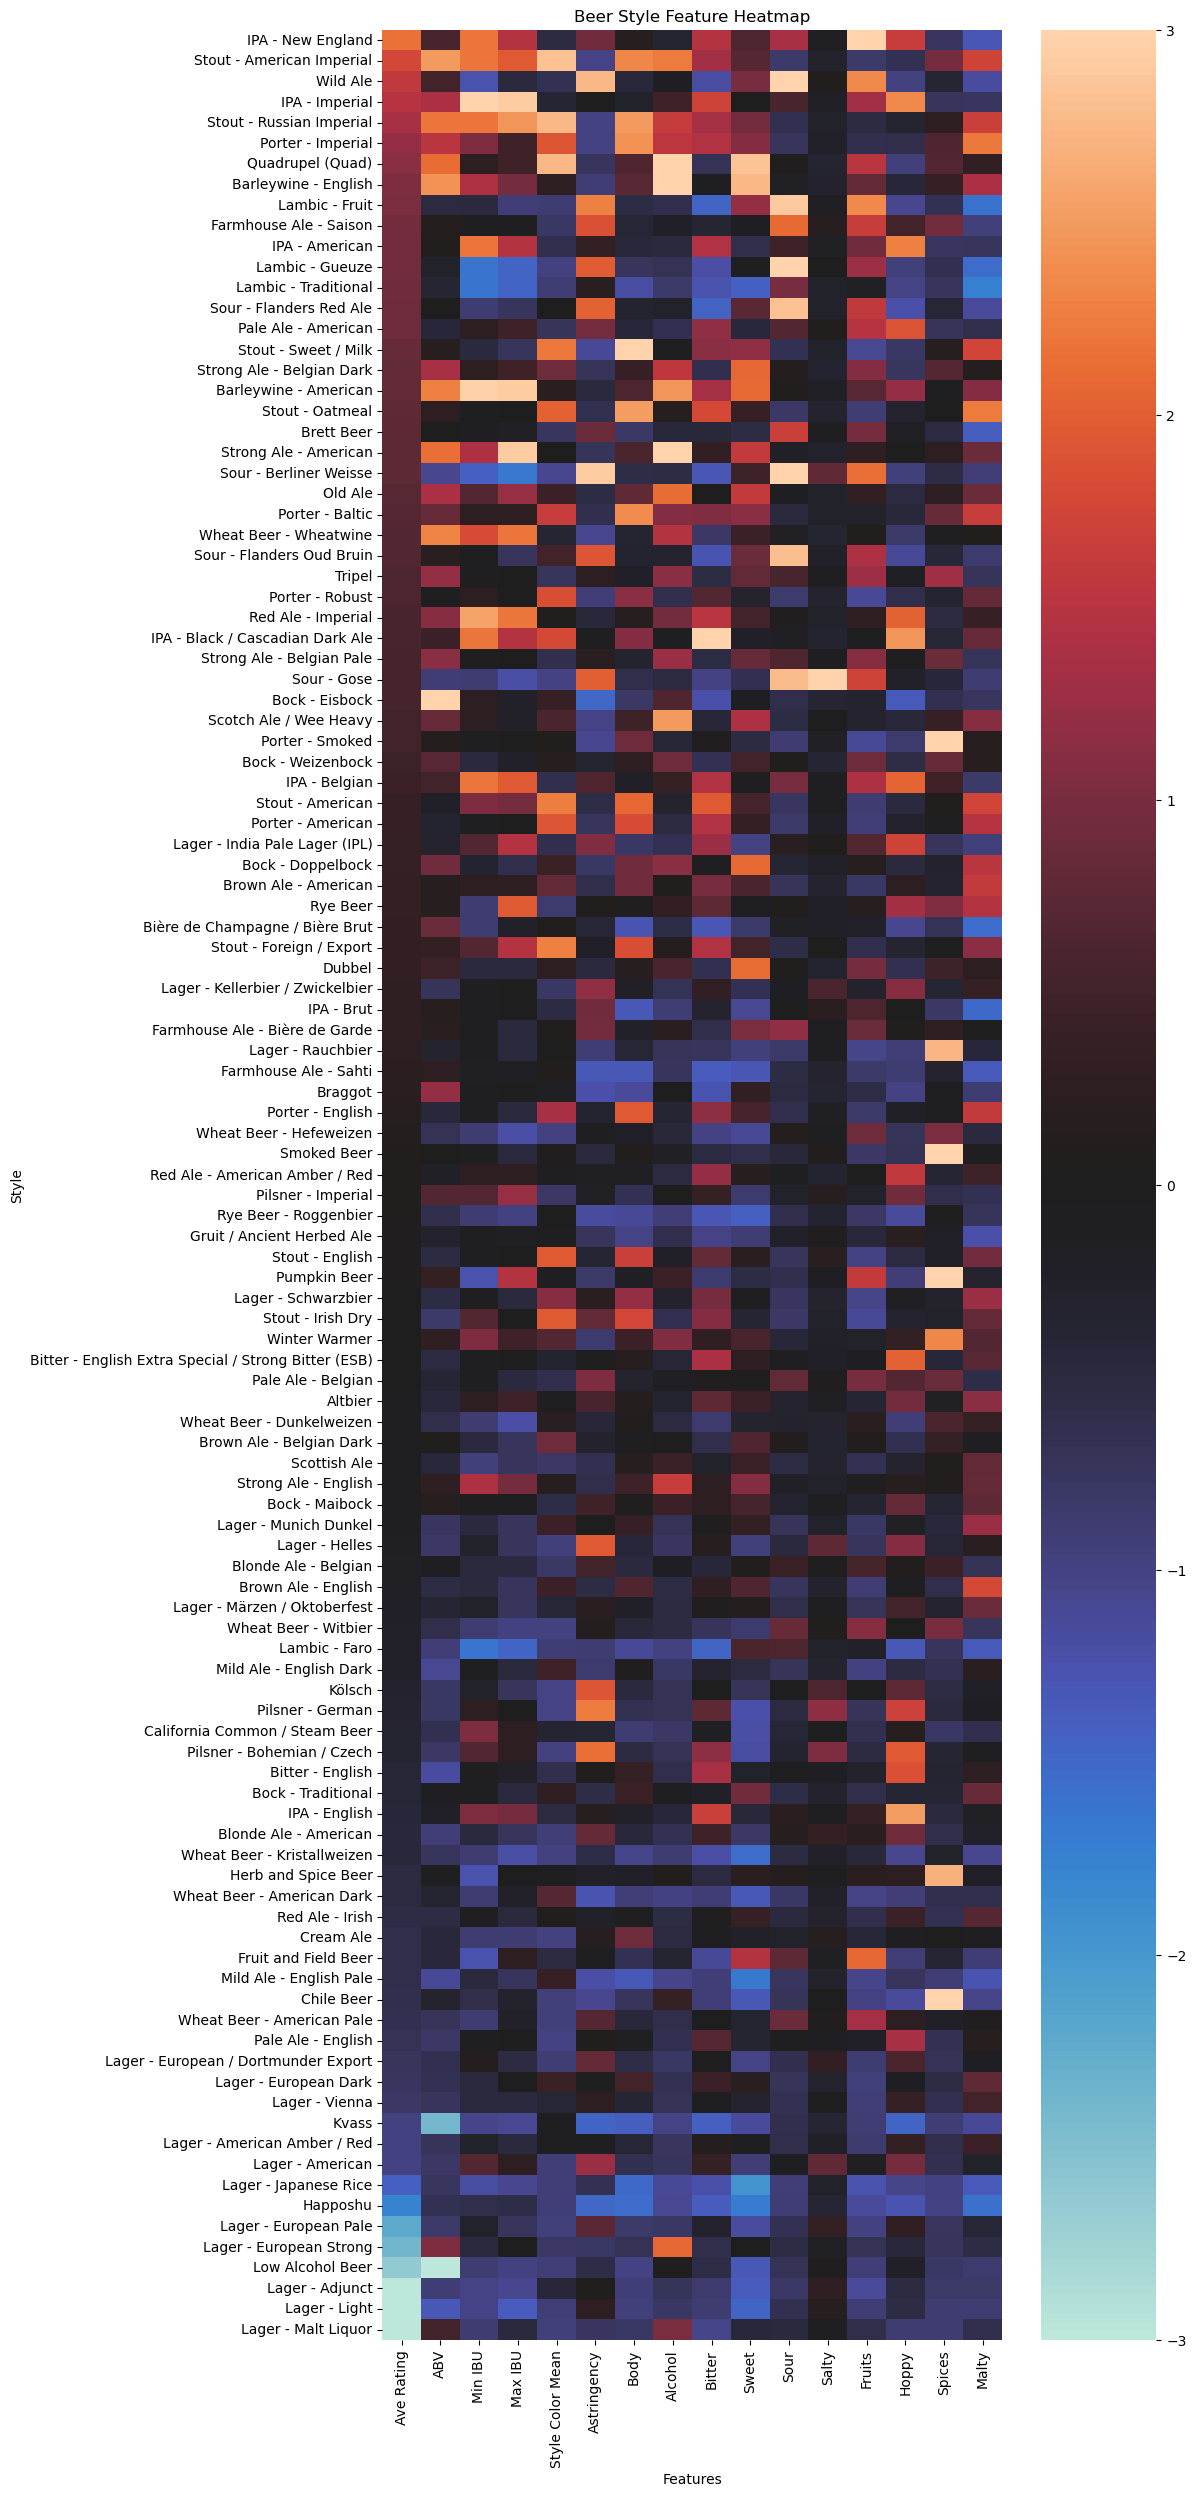

In [8]:
# Average feature heat map for each style
dfbr_Ave_Style_heatmap = final_merged_df[['Style_x','Ave Rating','ABV', 'Min IBU', 'Max IBU','Style Color Mean', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']]
dfbr_Ave_Style_heatmap = dfbr_Ave_Style_heatmap.groupby('Style_x').mean()
dfbr_Standard_Style_heatmap = (dfbr_Ave_Style_heatmap - dfbr_Ave_Style_heatmap.mean())/ dfbr_Ave_Style_heatmap.std()
dfbr_Standard_Style_heatmap = dfbr_Standard_Style_heatmap.sort_values(by='Ave Rating', ascending=False)
plt.figure(figsize=(10,30))
sns.heatmap(dfbr_Standard_Style_heatmap, cmap = 'icefire', center = 0, vmin=-3, vmax=3)
plt.title("Beer Style Feature Heatmap")
plt.xlabel('Features')
plt.ylabel('Style')
print(dfbr_Standard_Style_heatmap['Ave Rating'])
# with pd.option_context("display.max_rows", None, 'display.max_columns', None):
#     print(dfbr_Ave_Style_heatmap["Ave Rating"].sort_values(ascending=False))

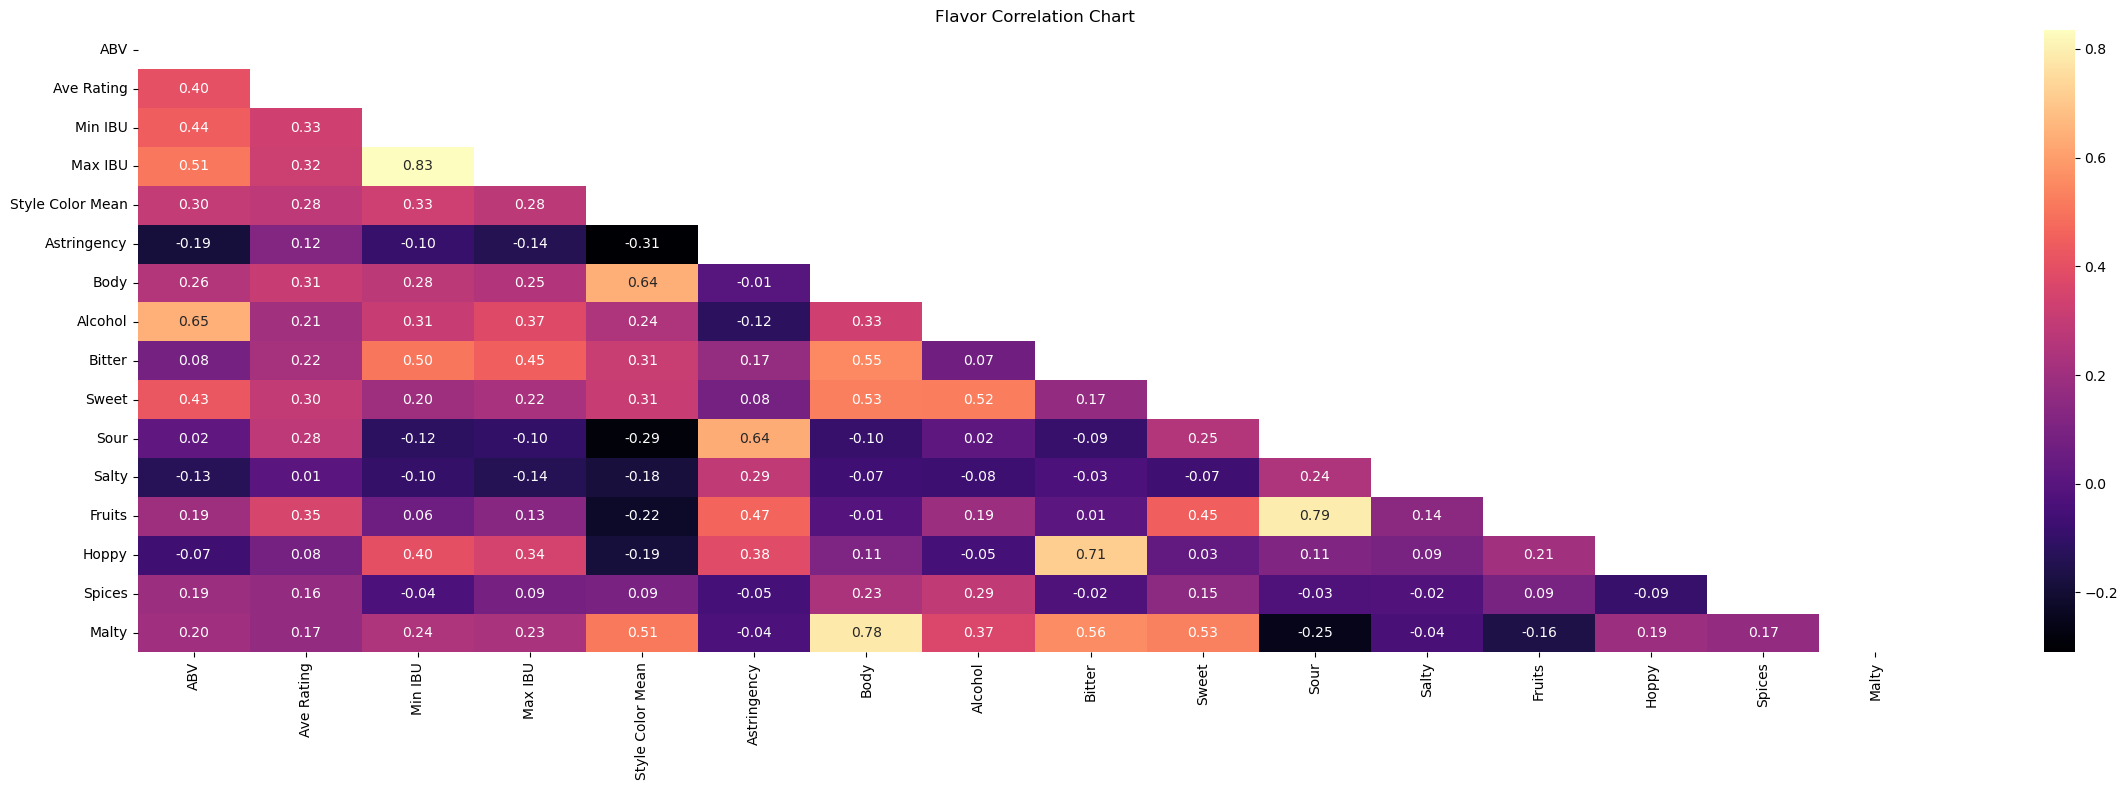

In [9]:
merged_flavor_rating_corr = final_merged_df[['ABV', 'Ave Rating', 'Min IBU', 'Max IBU', 'Style Color Mean', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']]
correlation_matrix = merged_flavor_rating_corr.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(24, 8))

# no droped rows
sns.heatmap(correlation_matrix, mask=mask, cmap='magma', annot=True, fmt=".2f")
plt.title('Flavor Correlation Chart')

plt.tight_layout()

plt.show()

## Notes on rating to flavor correlation ##
Over all, an increase in any flavor value gives an increase in rating. The all beer list of impotent rating flavors is.
1. ABV
2. Fruity
3. IBU
4. Body / thickness
5. Sweet
6. Sour
7. Apparent Bitterness
8. Apparent Alcohol taste
9. Malty
10. Spicy / warm
11. Astringent
12. Hoppy/Earthy
13. Salty

Something to keep in mind is the correlation assumes liner relationships. At some point I would expect any of the flavor to become so overpowering it lowers the rating of a beer.

Here are some interning flavor correlations
* Positive correlations
1. Sour + fruity + Astringency
2. Malty + body + Bitter + Sweet + alcohol
3. Hoppy + Astringency + bitter
4. light beer + Sour + fruity + hoppy
5. Dark Beer + Body + Bitter + ABV + Malty

* Negative correlations
1. (Salty + Astringency) + (ABV + IBU)
2.  malty + sour

---
### Style code finder ###
* I programed in a style code finder for some of the graphs below. The code finder will help make comparing beer styles more easy to do.

In [10]:
# Style locator if only the style key is known
style_key_number = 72

if style_key_number > 1:
    print(final_merged_df[final_merged_df['Style Key'] == style_key_number]['Style_x'].drop_duplicates())

3551    Porter - Robust
Name: Style_x, dtype: object


---

<Figure size 2000x2000 with 0 Axes>

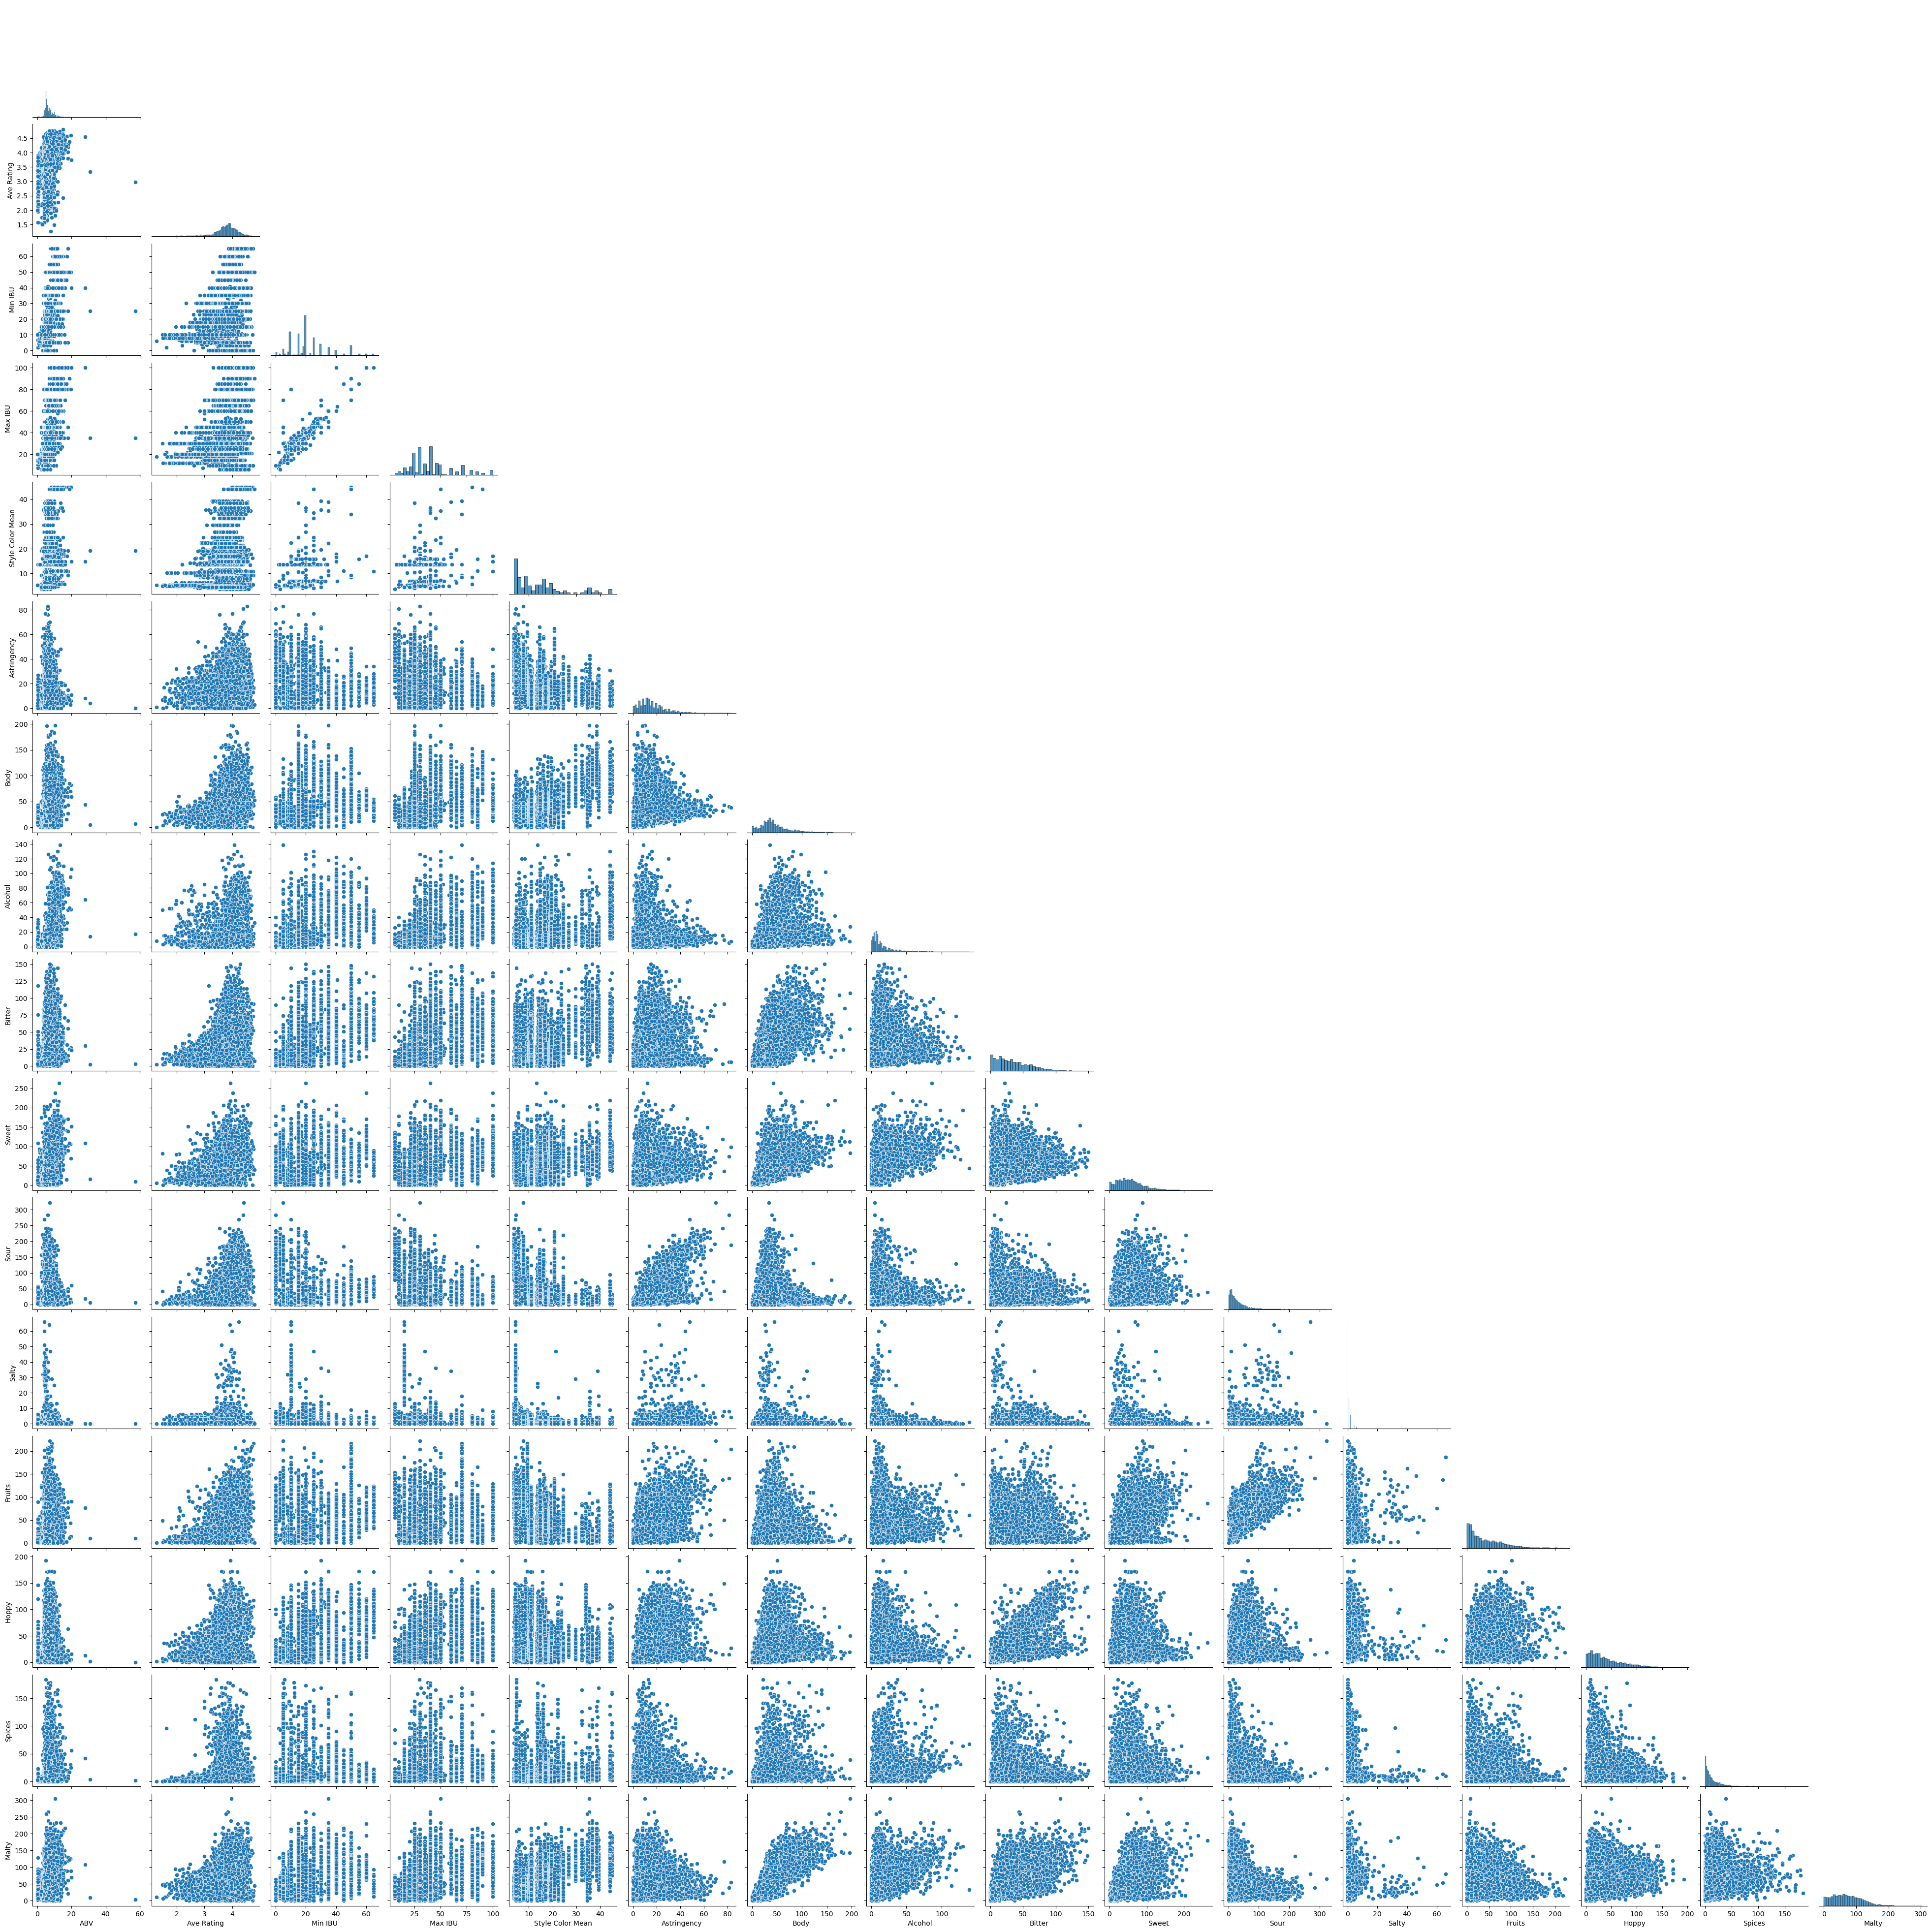

In [11]:
final_pairplot_df = final_merged_df[['Style_x', 'ABV', 'Ave Rating', 'Min IBU', 'Max IBU', 'Style Color Mean', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']]
# I do not recommend loading in this data but it dose give a good impression of the correlation data above

# # This takes about +2min to load
plt.figure(figsize=(20,20))
sns.pairplot(final_pairplot_df, corner= True) # you could add Style_x to hue but with so many styles it looks like color vomit

<Figure size 2000x2000 with 0 Axes>

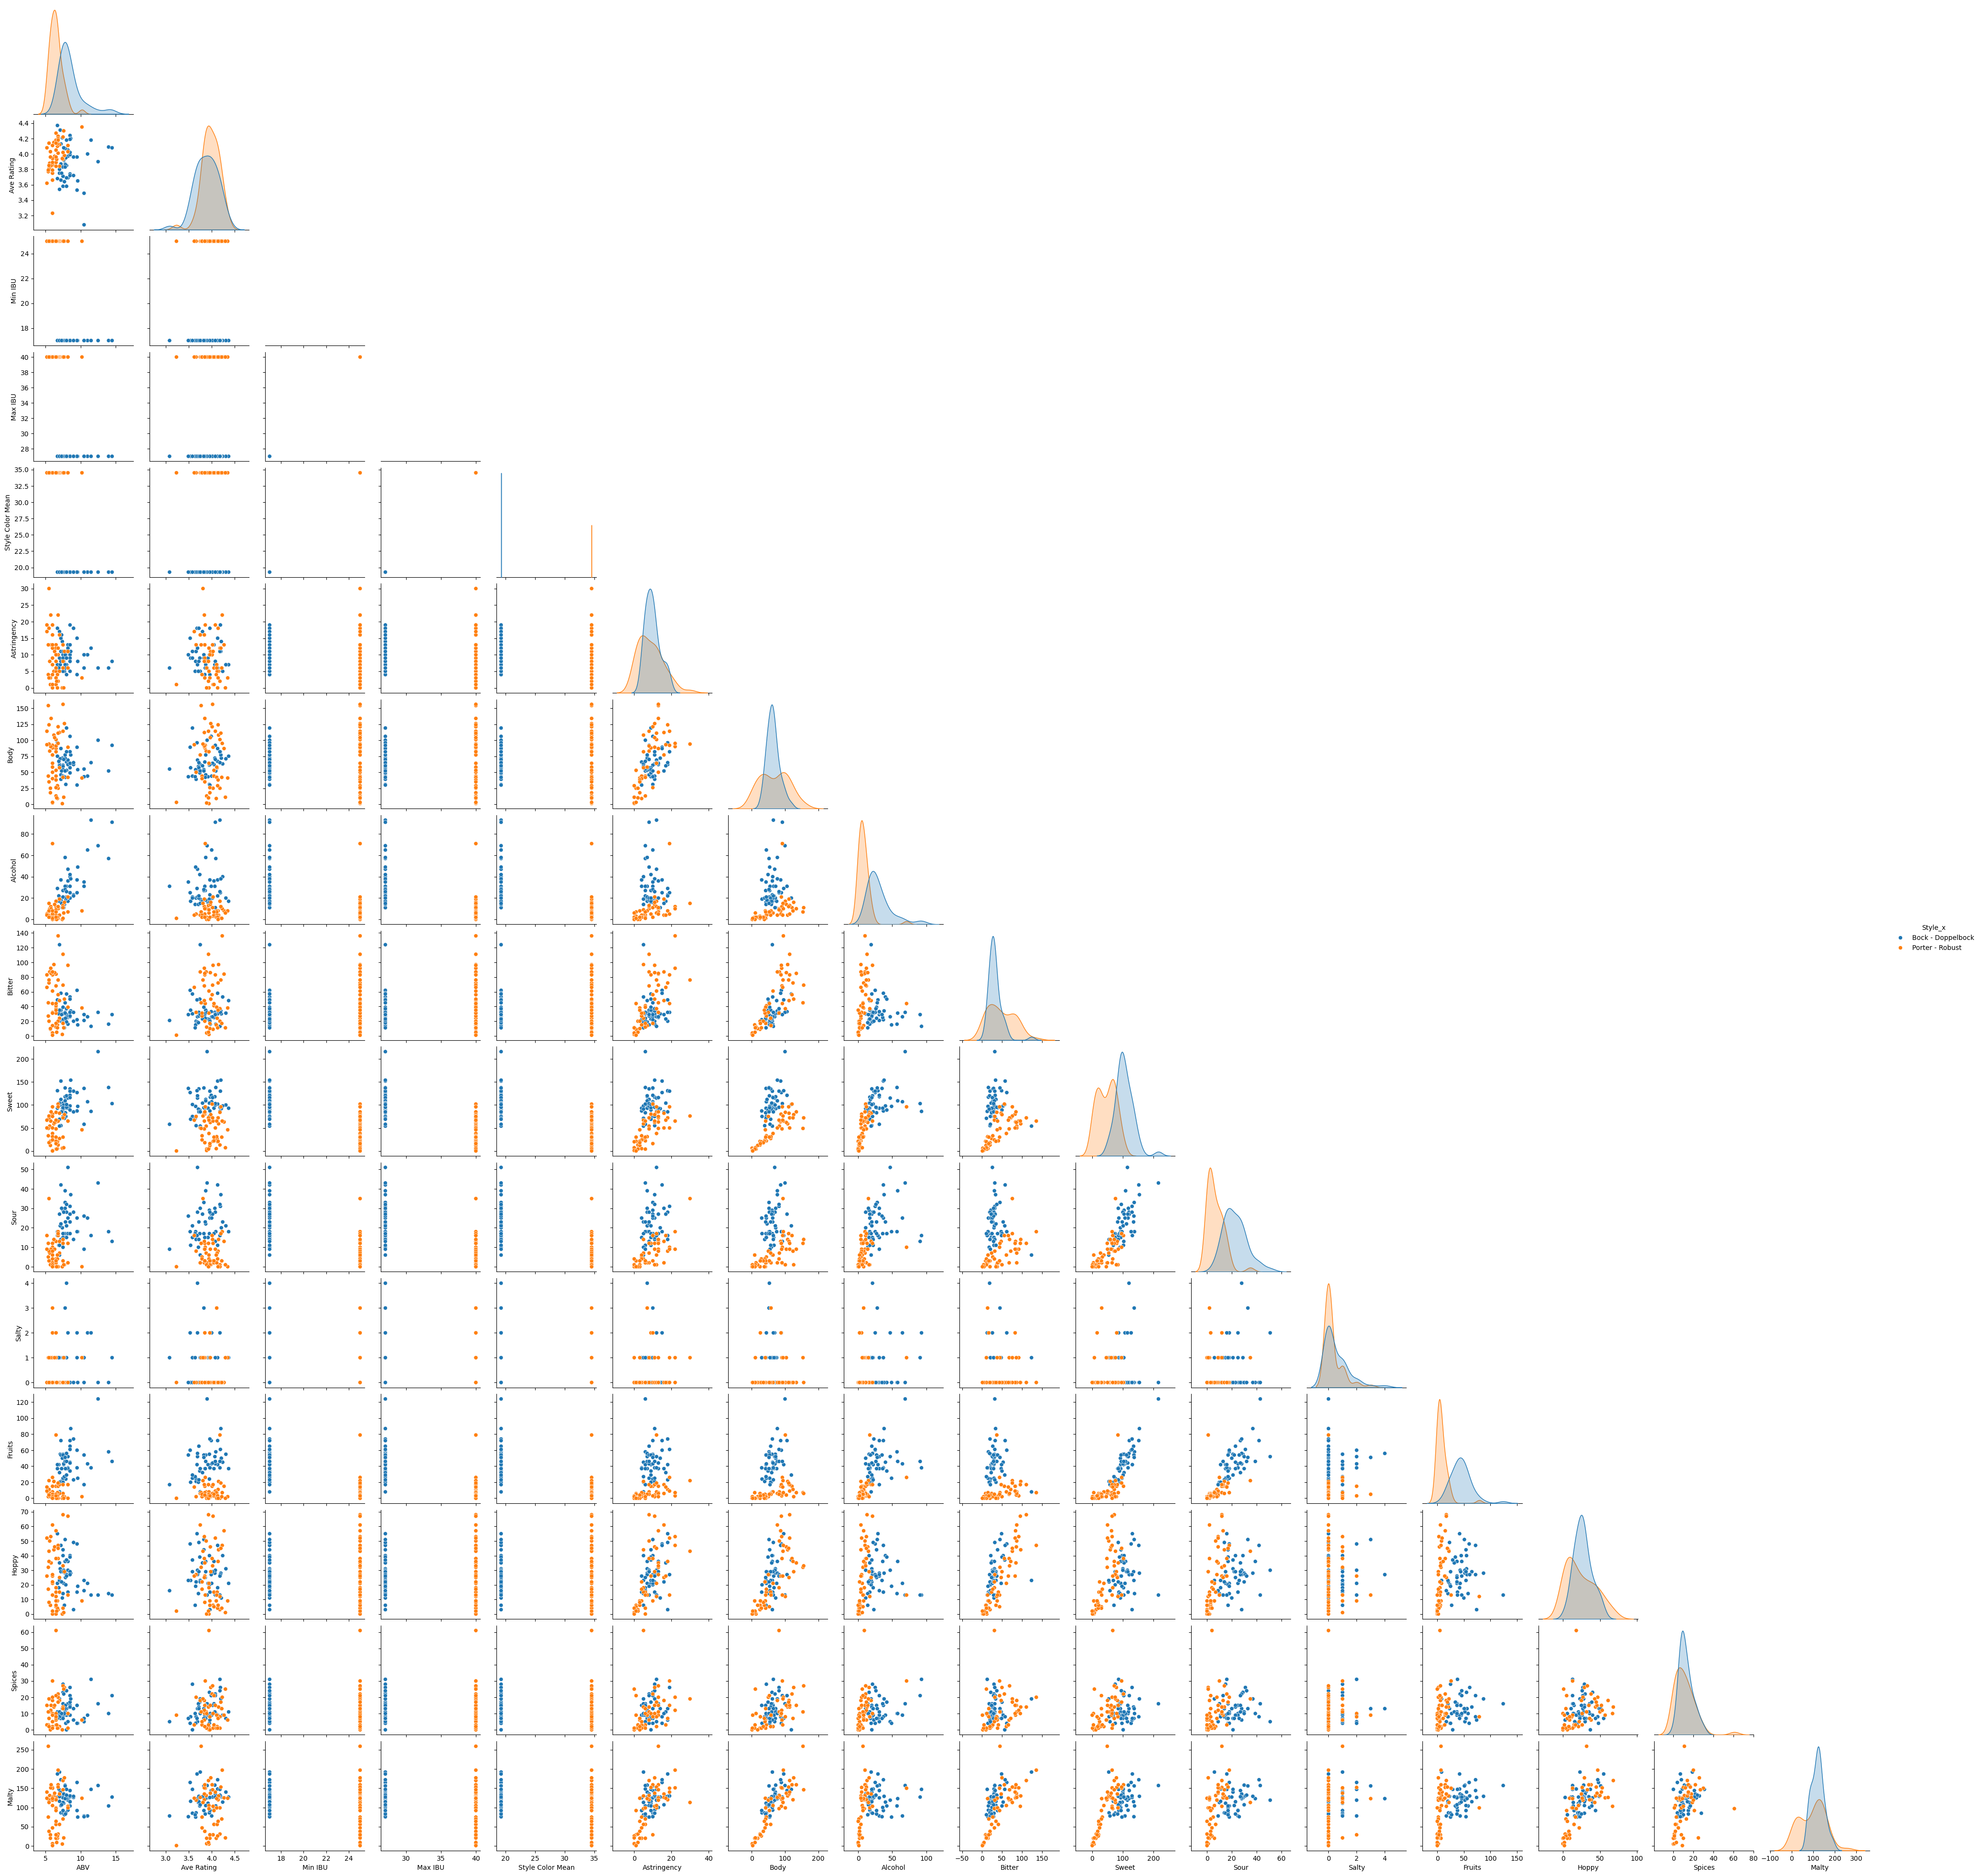

In [12]:
# if you are interested in seeing how 2 styles compare I wrote a sort code to make the pair plots more reasonable to look at
# can run more than 2 style comparisons.
style_of_intrest1 = 'Porter - Robust'
style_of_intrest2 = 'Bock - Doppelbock'
styles_of_intrest = [style_of_intrest1, style_of_intrest2]

style_of_intrest_df = final_pairplot_df[final_pairplot_df['Style_x'].isin(styles_of_intrest)]

# This takes about +2min to load
plt.figure(figsize=(20,20))
sns.pairplot(style_of_intrest_df, corner= True, hue='Style_x')

In [13]:
# now lets visualize the style data as a PCA plot to see how
import plotly.express as px
from sklearn.decomposition import PCA

final_PCA_df = final_merged_df[['Style_x', 'ABV', 'Min IBU', 'Max IBU', 'Style Color Mean', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']]

X = final_PCA_df[['ABV', 'Min IBU', 'Max IBU', 'Style Color Mean', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=final_PCA_df['Style_x'], width=1800, height=1200)
fig.show()

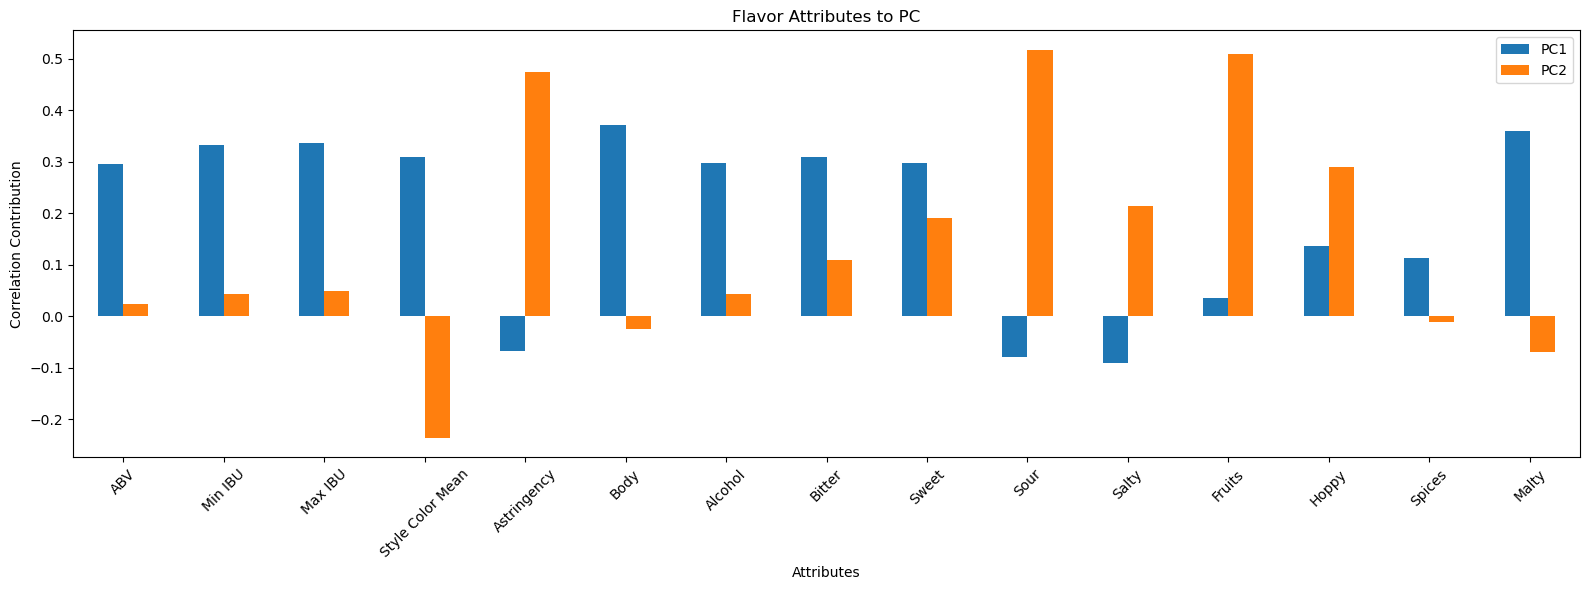

In [14]:
# PCA component analysis

PCA_analysis= final_PCA_df[['ABV', 'Min IBU', 'Max IBU', 'Style Color Mean', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']]

data_standardizer = StandardScaler().fit_transform(PCA_analysis)

# Step 2: Perform PCA
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(data_standardizer)

# Get the components (eigenvectors)
components = pca.components_

# Step 3: Create a DataFrame for the contributions
pc_contributions = pd.DataFrame(components.T, columns=['PC1', 'PC2'], index=PCA_analysis.columns)

# Step 4: Plot the contributions as a bar chart
pc_contributions.plot(kind='bar', figsize=(16, 6))
plt.title('Flavor Attributes to PC')
plt.ylabel('Correlation Contribution')
plt.xlabel('Attributes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Beer can not be organized into individual styles Via PCA, the data is to massive and styles overlap to much.
# I am going to organize beer into Groups and use a more powerful clustering method

In [16]:
# followed an online tutoral on how to do TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(PCA_analysis)

c:\Users\jrruh\anaconda3\envs\hwplot\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5420 samples in 0.015s...
[t-SNE] Computed neighbors for 5420 samples in 0.369s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5420
[t-SNE] Computed conditional probabilities for sample 2000 / 5420
[t-SNE] Computed conditional probabilities for sample 3000 / 5420
[t-SNE] Computed conditional probabilities for sample 4000 / 5420
[t-SNE] Computed conditional probabilities for sample 5000 / 5420
[t-SNE] Computed conditional probabilities for sample 5420 / 5420
[t-SNE] Mean sigma: 16.192896
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.733978
[t-SNE] KL divergence after 300 iterations: 2.209579


In [17]:
with pd.option_context('display.max_rows', None, 'display.max_rows', None):
    print(tsne_results[:,0])

[ 3.5571175   2.0478249  -0.62588394 ...  2.6236372   6.1565657
  0.7400196 ]


In [18]:
final_PCA_df['tsne-2d-one'] = tsne_results[:,0]
final_PCA_df['tsne-2d-two'] = tsne_results[:,1]


fig = px.scatter(final_PCA_df, x = 'tsne-2d-one', y = 'tsne-2d-two', color=final_PCA_df['Style_x'], width=1800, height=1200,)
fig.show()



C:\Users\jrruh\AppData\Local\Temp\ipykernel_22020\2248826265.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jrruh\AppData\Local\Temp\ipykernel_22020\2248826265.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
# T-SNE component analysis

# TSNE_corr_one = TSNE_df.corr()['tsne-2d-one'].abs().sort_values(ascending=False)

# # T-SNE 1
# plt.figure(figsize=(12, 6))
# sns.barplot(x=TSNE_corr_one.index, y=TSNE_corr_one.values)
# plt.xticks(rotation=90)
# plt.title('Correlations with t-SNE 1')
# plt.xlabel('Features')
# plt.ylabel('Correlation')
# plt.show()

# # T-SNE 2
# TSNE_corr_two = TSNE_df.corr()['tsne-2d-two'].abs().sort_values(ascending=False)

# plt.figure(figsize=(12, 6))
# sns.barplot(x=TSNE_corr_two.index, y=TSNE_corr_two.values)
# plt.xticks(rotation=90)
# plt.title('Correlations with t-SNE 2')
# plt.xlabel('Features')
# plt.ylabel('Correlation')
# plt.show()

In [20]:
# Creation of grater style gropes
# This is just one way to organize beers into larger groups for clustering, its not perfect but it helps.
Grater_styles = {
'Altbier' : 'Amber and Brown Ales',
'Pilsner - Bohemian / Czech' : 'Pale Ale',
'Quadrupel (Quad)' : 'Dark Heavy Ale',
'Pumpkin Beer' : 'Spiced and Smoked Beer',
'Porter - Smoked' : 'Spiced and Smoked Beer',
'Porter - Robust' : 'Porters and Stouts',
'Porter - Imperial' : 'Porters and Stouts',
'Porter - English' : 'Porters and Stouts',
'Porter - Baltic' : 'Porters and Stouts',
'Porter - American' : 'Porters and Stouts',
'Pilsner - Imperial' : 'Pale Ale',
'Pilsner - German' : 'Pale Ale',
'Pale Ale - English' : 'Pale Ale',
'Lager - Malt Liquor' : 'Dark Lager',
'Pale Ale - Belgian' : 'Pale Ale',
'Pale Ale - American' : 'Pale Ale',
'Old Ale' : 'Farm Style Ale',
'Mild Ale - English Dark' : 'Pale Ale',
'Low Alcohol Beer' : 'Light Lager',
'Barleywine - American' : 'Dark Heavy Ale',
'Lager - Vienna' : 'Dark Lager',
'Lager - Schwarzbier': 'Dark Lager',
'Lager - Rauchbier' : 'Spiced and Smoked Beer',
'Lager - Märzen / Oktoberfest' : 'Dark Lager',
'Red Ale - American Amber / Red' : 'Amber and Brown Ales',
'Red Ale - Imperial' : 'Amber and Brown Ales',
'Red Ale - Irish' : 'Amber and Brown Ales',
'Rye Beer' : 'Amber and Brown Ales',
'Wheat Beer - Witbier' : 'Wit Wheat Beer',
'Wheat Beer - Wheatwine' : 'Pale Ale',
'Wheat Beer - Hefeweizen' : 'Wit Wheat Beer',
'Wheat Beer - Dunkelweizen' : 'Wit Wheat Beer',
'Wheat Beer - American Pale' : 'Wit Wheat Beer',
'Tripel' : 'Golden Heavy Ale',
'Strong Ale - English' : 'Dark Heavy Ale',
'Strong Ale - Belgian Pale' : 'Golden Heavy Ale',
'Strong Ale - Belgian Dark' : 'Dark Heavy Ale',
'Strong Ale - American' : 'Dark Heavy Ale',
'Stout - Sweet / Milk' : 'Porters and Stouts',
'Stout - Russian Imperial' : 'Porters and Stouts',
'Stout - Oatmeal' : 'Porters and Stouts',
'Stout - Irish Dry' : 'Porters and Stouts',
'Stout - Foreign / Export' : 'Porters and Stouts',
'Stout - English' : 'Porters and Stouts',
'Stout - American' : 'Porters and Stouts',
'Stout - American Imperial' : 'Porters and Stouts',
'Smoked Beer' : 'Spiced and Smoked Beer',
'Scottish Ale' : 'Dark Heavy Ale',
'Scotch Ale / Wee Heavy' : 'Dark Heavy Ale',
'Lager - Munich Dunkel' : 'Dark Lager',
'Winter Warmer' : 'Spiced and Smoked Beer',
'Lager - Light' : 'Light Lager',
'IPA - Brut' : 'IPA',
'Bock - Traditional' : 'Amber and Brown Ales',
'IPA - American' : 'IPA',
'Herb and Spice Beer' : 'Spiced and Smoked Beer',
'Bitter - English' : 'Pale Ale',
'Fruit and Field Beer' : 'Fruit and Sour Beer',
'Farmhouse Ale - Saison' : 'Farm Style Ale',
'Lager - Kellerbier / Zwickelbier': 'Dark Lager',
'Barleywine - English' : 'Dark Heavy Ale',
'Farmhouse Ale - Bière de Garde' : 'Farm Style Ale',
'Dubbel' : 'Dark Heavy Ale',
'Cream Ale' : 'Pale Ale',
'Chile Beer' : 'Spiced and Smoked Beer',
'California Common / Steam Beer' : 'Pale Ale',
'Brown Ale - English' : 'Amber and Brown Ales',
'Brown Ale - Belgian Dark' : 'Amber and Brown Ales',
'Brown Ale - American' : 'Amber and Brown Ales',
'Bock - Maibock' : 'Amber and Brown Ales',
'IPA - Black / Cascadian Dark Ale' : 'IPA',
'IPA - Belgian' : 'IPA',
'IPA - English' : 'IPA',
'Bock - Doppelbock' : 'Amber and Brown Ales',
'Blonde Ale - American' : 'Pale Ale',
'Lager - India Pale Lager (IPL)' : 'Dark Lager',
'Lager - Helles' : 'Dark Lager',
'Lager - European Strong' : 'Dark Lager',
'IPA - Imperial' : 'IPA',
'Lager - European Pale' : 'Light Lager',
'Lager - European Dark' : 'Dark Lager',
'Blonde Ale - Belgian' : 'Pale Ale',
'Lager - European / Dortmunder Export' : 'Dark Lager',
'Lager - American' : 'Light Lager',
'Lager - American Amber / Red' : 'Dark Lager',
'Lager - Adjunct' : 'Light Lager',
'Kölsch' : 'Light Lager',
'Bitter - English Extra Special / Strong Bitter (ESB)': 'Pale Ale',
'IPA - New England' : 'IPA',
'Bock - Weizenbock' : 'Amber and Brown Ales',
'Sour - Berliner Weisse' : 'Fruit and Sour Beer',
'Sour - Flanders Oud Bruin' : 'Fruit and Sour Beer',
'Sour - Flanders Red Ale' : 'Fruit and Sour Beer',
'Sour - Gose' : 'Fruit and Sour Beer',
'Lambic - Gueuze' : 'Fruit and Sour Beer',
'Lambic - Fruit' : 'Fruit and Sour Beer',
'Wild Ale' : 'Fruit and Sour Beer',
'Brett Beer' : 'Fruit and Sour Beer',
'Gruit / Ancient Herbed Ale' : 'Farm Style Ale',
'Kvass' : 'Farm Style Ale',
'Wheat Beer - American Dark' : 'Dark Heavy Ale',
'Wheat Beer - Kristallweizen' : 'Wit Wheat Beer',
'Braggot' : 'Farm Style Ale',
'Mild Ale - English Pale' : 'Pale Ale',
'Lager - Japanese Rice' : 'Light Lager',
'Lambic - Traditional' : 'Fruit and Sour Beer',
'Rye Beer - Roggenbier' : 'Amber and Brown Ales',
'Bière de Champagne / Bière Brut' : 'Dark Heavy Ale',
'Happoshu' : 'Light Lager',
'Bock - Eisbock' : 'Amber and Brown Ales',
'Farmhouse Ale - Sahti' : 'Farm Style Ale',
'Lambic - Faro' : 'Fruit and Sour Beer'
}


final_merged_df['Style_Group'] = final_merged_df['Style_x'].map(Grater_styles)


In [22]:
# Add description to Beer_df for use in streamlit app

BEER_df = pd.read_csv(r'C:\Users\jrruh\OneDrive\Documents\Homework\Data Sciance\CSME 830\Project 1\Beer_df')

BEER_df = BEER_df.rename(columns={'Name': 'Name of Beer', 'Style_x':'Brewing Style', 'Style Color Mean': 'Style Color Mean (SRM)', 'Style Color Var':'Style Color Var (SRM)'})

BEER_TSNE_df = BEER_df[['Brewing Style', 'ABV', 'Min IBU', 'Max IBU', 'Style Color Mean (SRM)', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty', 'Style_Group']]
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

BEER_TSNE_df['tsne-comp-one'] = tsne_results[:,0]
BEER_TSNE_df['tsne-comp-two'] = tsne_results[:,1]

BEER_TSNE_df.to_csv('BEER_TSNE_df', index=False)

BEER_PCA_df = BEER_df[['Brewing Style', 'ABV', 'Min IBU', 'Max IBU', 'Style Color Mean (SRM)', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty', 'Style_Group']]

X = BEER_PCA_df[['ABV', 'Min IBU', 'Max IBU', 'Style Color Mean (SRM)', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)


c:\Users\jrruh\anaconda3\envs\hwplot\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5420 samples in 0.013s...
[t-SNE] Computed neighbors for 5420 samples in 0.359s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5420
[t-SNE] Computed conditional probabilities for sample 2000 / 5420
[t-SNE] Computed conditional probabilities for sample 3000 / 5420
[t-SNE] Computed conditional probabilities for sample 4000 / 5420
[t-SNE] Computed conditional probabilities for sample 5000 / 5420
[t-SNE] Computed conditional probabilities for sample 5420 / 5420
[t-SNE] Mean sigma: 16.192896
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.734039
[t-SNE] KL divergence after 300 iterations: 2.209574


C:\Users\jrruh\AppData\Local\Temp\ipykernel_22020\4189723765.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jrruh\AppData\Local\Temp\ipykernel_22020\4189723765.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
BEER_TSNE_df.to_csv('BEER_TSNE_df', index=False)

In [23]:
TSNE_style_group_df = final_merged_df[['Style_x', 'ABV', 'Min IBU', 'Max IBU', 'Style Color Mean', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty', 'Style_Group']]

TSNE_style_group_df['tsne-2d-one'] = tsne_results[:,0]
TSNE_style_group_df['tsne-2d-two'] = tsne_results[:,1]

# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="tsne-2d-one", y="tsne-2d-two",
#     hue="Style_Group",
#     palette=sns.color_palette("hls", 13),
#     data= TSNE_style_group_df,
#     legend="full",
# )

fig = px.scatter(TSNE_style_group_df, x = 'tsne-2d-one', y = 'tsne-2d-two', color=TSNE_style_group_df['Style_Group'], width=1800, height=1200,
                 color_discrete_sequence=px.colors.qualitative.Dark24,)
fig.show()

C:\Users\jrruh\AppData\Local\Temp\ipykernel_16728\1340216254.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jrruh\AppData\Local\Temp\ipykernel_16728\1340216254.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
final_PCA_style_group_df = final_merged_df[['Style_Group', 'ABV', 'Min IBU', 'Max IBU', 'Style Color Mean', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']]

X = final_PCA_style_group_df[['ABV', 'Min IBU', 'Max IBU', 'Style Color Mean', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=final_PCA_style_group_df['Style_Group'], width=1800, height=1200)
fig.show()

Text(145.72222222222223, 0.5, 'Style_Group')

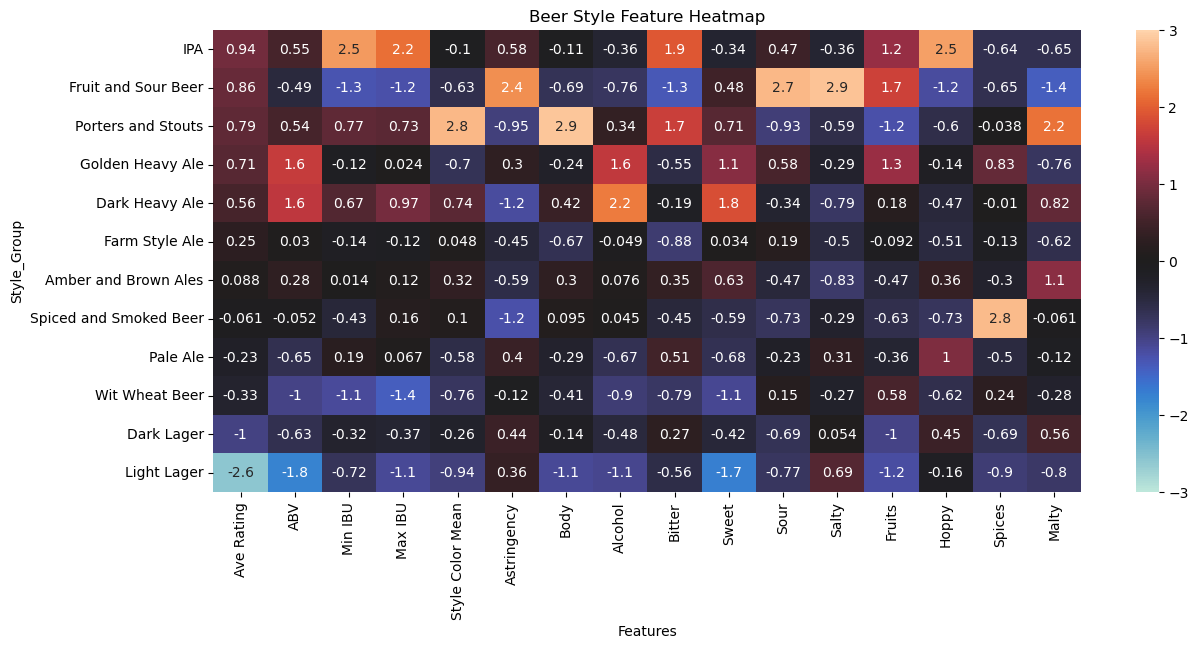

In [25]:
dfbr_Ave_Style_Group_heatmap = final_merged_df[['Style_Group', 'Ave Rating','ABV', 'Min IBU', 'Max IBU','Style Color Mean', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']]
dfbr_Ave_Style_Group_heatmap = dfbr_Ave_Style_Group_heatmap.groupby('Style_Group').mean()
dfbr_Standard_Style_Group_heatmap = (dfbr_Ave_Style_Group_heatmap - dfbr_Ave_Style_Group_heatmap.mean())/ dfbr_Ave_Style_Group_heatmap.std()
dfbr_Standard_Style_Group_heatmap = dfbr_Standard_Style_Group_heatmap.sort_values(by='Ave Rating', ascending=False)
plt.figure(figsize=(14,6))
sns.heatmap(dfbr_Standard_Style_Group_heatmap, annot=True, cmap = 'icefire', center = 0, vmin=-3, vmax=3)
plt.title("Beer Style Feature Heatmap")
plt.xlabel('Features')
plt.ylabel('Style_Group')

## Whats Makes A Good Beer ##
* According to the data I have, A good beer is a Beer with one or more strong flavor attributes. Each beer group ranked above the mean exhibits one or more attributes that is at least one 'standard deviation' or about 70% more pronounced than most beers.
* A single beer can not exhibit a strong flavor in all flavor attributes as some flavors are negatively correlated to one another.
* The beer styles provided in the data can not all be told apart based on flavor alone. The further apart two beers are in the PCA or TSNE graphs the easier it is to tell them apart
* Some beer styles are well defined like the sour, IPA, and Porter/Stout beers. Other styles have a lot of variety to them such as the pale, brown, and amber ales.
* Based on the PCA and TSNE analysis, its hard to tell specific beer styles apart from one another only using the flavor guide used in data analysis. A more extensive beer analysis and rank dataset is required to determent if beer in a similar style group are truly different from one another. An Example of  braking up columns into more components is like fruity into citrus, tropical, and dark fruits.
* Another way of possibly bettering the style identification using data is to collect recipe components, although I understand a commercial operation would prefer to keep there recipes secret so this option is unlikely.
* Although the data dose not show this, beer tastes, and opinions on what makes a good beer change over time. The data used for ranks above was from 2021 and as of today (Late 2024) beer styles like IPAs are slowly falling out of favor (sales wise) and trending toward more of a balanced beer like amber and wheat beers.
* Just because a beer sells more dose not mean its a good beer. light lagers are some of the most widely purchase and drank beers yet people or at least the beer ranking panel seams to rank them as the worst beer.